# Recession Predictor Part 1

The United States as of today (October, 2019) has experienced the longest expansion cycle, yet the there are constant talks in the news about an impending recession. Yes, there are signs, such as the recent yield curve inversion, the market corrections in 2018 & 2019, etc. Recessions happen every 10 years or so, are we overdue for one?

Explain other methodologies used to predict recession.
*Federal Reserve
*Rabobank
*Blah
*Blah

Explain what I'm trying to do, not only to look at recession as a binary as NBER describes it, but also to predict future GDP in the [] futre terms.

For decision variable, we will two methods:
1. Predicting GDP growth.
2. Predicting probability of a recession.

## Feature Selection

Feature selection is important, as the rule of "garbage in, garbage out" applies. While there are techniques and algorithms to systematically select variables, this is outside the scope of this analysis.Instead, we will rely on domain knowledge to quickly select desired feastures. The following factors are considered when selecting input indicator variables:
* Having sufficient data, as recessions are rare occurances.
* Having forward predictive power, which means inflection changes should lead or occur simultaneously as inflection changes in GDP.
* Represent various aspects and mechanisms of the economy, such as a risk free benchmark, or inflation.
* Avoid composite models or indices. The goal is to construct our own model.

For the GDP decision variable:
* [**Real Gross Domestic Product**](https://fred.stlouisfed.org/series/GDPC1)- Inflation adjusted value of goods and services produced in a year.

For equities, the following variables are considered:
* [S&P 500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC)- Weighted stock index of 500 companies listed on US exchanges with the largest market cap.
* [S&P 500 Cyclically Adjusted PE Ratio](https://www.quandl.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-Shiller-PE-Ratio-by-Month) [(info)](https://www.investopedia.com/terms/c/cape-ratio.asp)- Normalizes PE ratio fluctuations over 10 year inflation-adjusted earnings. This indicator is used to gauge whether the equities market is over or under-valued.
* [**Nonfinancial Corporate Debt as Percentage of Equity**](https://fred.stlouisfed.org/series/NCBCMDPMVCE)- Contains companies not in the S&P 500. Although this indicator excludes [% of GDP](), valuations of financial and noncorporate companies 

For bonds, the following variables are considered: 
* [10 Year Constant Maturity Minus 3 Month Treasuries Yield Spread](https://fred.stlouisfed.org/series/T10Y3M)- Federal Reserve's main methodology. Financial institutions borrow at low rates short term, to lend at high rates long term. High spread means  The data only goes back to 1982, which is not enough to train this model.
* [**10 Year Constant Maturity Minus 3 Month Treasuries Secondary Market Yield Spread**](https://fred.stlouisfed.org/series/TB3MS)- Makes up for the lack of data in the primary market. Primary and secondary market spreads are very close today, due to electronic trading. However, the spread has been higher historically. This discrepancy is mostly caused by information inefficiency. Federal Reserve also [manipulates rates to some degree](https://fredblog.stlouisfed.org/2017/02/lets-do-the-twist/). Since this model relies on multiple input indicators, this flaw can be overlooked. 
* [10 Year Treasuries Constant Maturity Rate](https://fred.stlouisfed.org/series/DGS10)- Long term treasuries usually reflect investor sentiment regarding long term economic growth, with higher yield . This does not provide strong evidence of liquidity.
* 3 Months Outstanding Repo [(info)](http://law.emory.edu/ecgar/content/volume-5/issue-2/essays/repo-recession-financial-regulation.html)- Hard to find on the web. Before the Great Recession, investment banks used short term repo to inject liquidity to stay afloat. Uptick in short term repo may indicate credit crunch. FRED only has records of contracts with itself as a participant, leaving out the majority of transactions.

For inflation, the following indicators are considered:
* [**Consumer Price Index for Urban Consumers**](https://fred.stlouisfed.org/series/CPIAUCSL) [(info)](https://www.bls.gov/opub/btn/volume-3/why-does-bls-provide-both-the-cpi-w-and-cpi-u.htm)- Price inflation covering 88% of Americans, calculated from expenditures. Uses a survey to calculate the basket of goods and services. Basket is updated every 2 years. Selected due to difficulty quantifying intangible traits such as quality.
* [Chained Consumper Price Index for Urban Consumers](https://fred.stlouisfed.org/series/SUUR0000SA0) [(info)](https://www.brookings.edu/blog/up-front/2017/12/07/the-hutchins-center-explains-the-chained-cpi/)- Lacking long term data. Similar to CPI-U, but considers substitution purchases, and weights the changes every month.

For employment, the following indicators are considered:
* [Labor Participation Rate](https://fred.stlouisfed.org/series/CIVPART)- Percent of population over 16 actively seeking or engaged in employment. Too macro driven, such as women participation in the workforce, or retirement of Baby Boomers.
* [**Total Nonfarm Payroll**](https://fred.stlouisfed.org/series/PAYEMS)- Accounts for 80% of workers who contribute to GDP, excluding propritors, unpaid volunteers, or farm workers.
* [Wage Growth](https://fred.stlouisfed.org/series/CES0500000003)- Lack of long term data.

Lastly, the following indicators are not placed in any categories above, but are included because of their predictive power.
* [**Real Private Gross Investment**](https://fred.stlouisfed.org/series/GPDIC1)- Investment represents expenditure on capital goods and residential properties. Provides an indicator for future productivity and GDP growth. Also a strong sign of economic recovery.

The following indicators were considered, but ultimately dismissed.
* [Purchaing Managers' Index](https://www.instituteforsupplymanagement.org/ismreport/mfgrob.cfm?SSO=1)- Locked behind paywall. A survey of supply chain professionals in 19 primary industries.
* [Composite Index of Leading Indicators](https://www.conference-board.org/data/bcicountry.cfm?cid=1) [(info)](https://www.investopedia.com/terms/c/cili.asp)- Locked behind paywall. A composite index of 10 indicators.
* [Consumer Confidence Index](https://www.conference-board.org/data/consumerconfidence.cfm)- Locked behind paywall. A survey of consumer purchases and sentiments.
* [VIX Volativity Index](https://fred.stlouisfed.org/series/VIXCLS)- Describes the volatility, not the direction, of stocks. Also does not describe economic strength.
* [Effective Federal Funds Rate](https://fred.stlouisfed.org/series/FEDFUNDS)- Not an organic indicator of market conditions. Different FED chairs have different doctrines. The FED was fighting inflation in the 70s, deregulation in the 80s, inflation targeting in the 90s & 2000s, then quantitative easing in the 2010s. 
* Change in working hours- Symptom, not sign, of economic strength.
* [Personal Savings Rate](https://fred.stlouisfed.org/series/PSAVERT)- Too macro driven, such as women entering workforce, or retirement of Baby Boomers.
* Incremental Capital Outputs Ratio- Hard to find on the web. Calculates how much additional capital investment is needed to create growth.

## Data Preparation

First, import the necessary packages.

In [1]:
import fredapi
import numpy as np
import pandas as pd
import scipy as sp
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#import matplotlib as mpl
#import seaborn as sb
#import sklearn as sk

#### Import FRED Data

To import FRED data, we need an API key. API key can be requested [here](https://research.stlouisfed.org/docs/api/fred/).

In [2]:
f = fredapi.Fred(api_key='8b91217446b6307d20cb5e4fcfba70eb') # remove API when done

Data returned by fredapi module are in "series" format. We need to convert them to "dataframe" format.

We will also rename the columns so the data become easier to manipulate.

In [3]:
# monthly data.
tbill_3m = f.get_series('TB3MS').to_frame().reset_index().rename(columns={'index':'date', 0:'tbill_3m'})
tbill_10y = f.get_series('GS10').to_frame().reset_index().rename(columns={'index':'date', 0:'tbill_10y'})
cpiu = f.get_series('CPIAUCSL').to_frame().reset_index().rename(columns={'index':'date', 0:'cpiu'})
payroll = f.get_series('PAYEMS').to_frame().reset_index().rename(columns={'index':'date', 0:'payroll'})
# quarterly data
dtoe = f.get_series('NCBCMDPMVCE').to_frame().reset_index().rename(columns={'index':'date', 0:'dtoe'})
pinvest = f.get_series('GPDIC1').to_frame().reset_index().rename(columns={'index':'date', 0:'pinvest'})
gdp = f.get_series('GDPC1').to_frame().reset_index().rename(columns={'index':'date', 0:'gdp'})

In [4]:
print(type(tbill_3m))

<class 'pandas.core.frame.DataFrame'>


#### Setting Start Date

Note some data are monthly, while others are quarterly. They need to be dealt with separately.

Note that all variables have different startig dates.

In [5]:
print(tbill_3m.head(1))
print(tbill_10y.head(1))
print(cpiu.head(1))
print(payroll.head(1))
print(dtoe.head(1))
print(pinvest.head(1))
print(gdp.head(1))
print(tbill_3m.tail(1))
print(tbill_10y.tail(1))
print(cpiu.tail(1))
print(payroll.tail(1))
print(dtoe.tail(1))
print(pinvest.tail(1))
print(gdp.tail(1))

        date  tbill_3m
0 1934-01-01      0.72
        date  tbill_10y
0 1953-04-01       2.83
        date   cpiu
0 1947-01-01  21.48
        date  payroll
0 1939-01-01  29923.0
        date       dtoe
0 1945-10-01  43.061963
        date  pinvest
0 1947-01-01  218.091
        date       gdp
0 1947-01-01  2033.061
           date  tbill_3m
1029 2019-10-01      1.65
          date  tbill_10y
798 2019-10-01       1.71
          date     cpiu
872 2019-09-01  256.358
          date   payroll
969 2019-10-01  151945.0
          date      dtoe
294 2019-04-01  32.87862
          date   pinvest
290 2019-07-01  3411.382
          date        gdp
290 2019-07-01  19112.542


Some also have null values in the middle.

In [6]:
print(dtoe.iloc[20:25,:])

         date       dtoe
20 1950-10-01  55.603398
21 1951-01-01        NaN
22 1951-04-01        NaN
23 1951-07-01        NaN
24 1951-10-01  53.423337


For consistency, we will set the starting date at 1953/4/1.

In [7]:
start_date = pd.to_datetime('1953, 4')
tbill_3m = tbill_3m[tbill_3m.iloc[:,0] >= start_date]
tbill_10y = tbill_10y[tbill_10y.iloc[:,0] >= start_date]
cpiu = cpiu[cpiu.iloc[:,0] >= start_date]
payroll = payroll[payroll.iloc[:,0] >= start_date]
pinvest = pinvest[pinvest.iloc[:,0] >= start_date]
dtoe = dtoe[dtoe.iloc[:,0] >= start_date]
gdp = gdp[gdp.iloc[:,0] >= start_date]

#### Returning Treasury Spread

In [8]:
tbill = [tbill_10y, tbill_3m]
tbill = reduce(lambda left,right: pd.merge(left,right,on='date'), tbill)
tbill = tbill.set_index('date')

tbill['tbill_10y'] = tbill.loc[:,'tbill_10y'] - tbill.loc[:,'tbill_3m']
tbill = tbill.drop('tbill_3m', axis=1)
tbill = tbill.rename(columns={'tbill_10y':'tbill'})

In [9]:
tbill.head()

,tbill
date,
1953-04-01,0.64
1953-05-01,0.89
1953-06-01,1.00
1953-07-01,0.89
1953-08-01,0.91


#### Converting Quarterly to Monthly Data and Null Value Interpolation

In [10]:
dtoe = dtoe.set_index('date').resample('MS').asfreq()
pinvest = pinvest.set_index('date').resample('MS').asfreq()
gdp = gdp.set_index('date').resample('MS').asfreq()

In [11]:
gdp.head(2)

,gdp
date,
1953-04-01,2718.709
1953-05-01,NaN


We will use [cublic spline interpolation](https://columbiaeconomics.com/2010/01/20/how-economists-convert-quarterly-data-into-monthly-cubic-spline-interpolation/), a technique commonly used by economists. Cubic spline has better smoothing over quadratic interpolation.

In [12]:
gdp = gdp['gdp'].interpolate(method='spline', order=3)
dtoe = dtoe['dtoe'].interpolate(method='spline', order=3)
pinvest = pinvest['pinvest'].interpolate(method='spline', order=3)

Interpolation converts data to series. We need to convert back to DataFrame type.

In [13]:
gdp = gdp.to_frame().reset_index()
dtoe = dtoe.to_frame().reset_index()
pinvest = pinvest.to_frame().reset_index()

## Preliminary Analysis

Join all variables into the one dataframe.

In [14]:
data = [tbill, cpiu, payroll, dtoe, pinvest, gdp]
data = reduce(lambda left,right: pd.merge(left,right,on='date'), data)
data = data.set_index('date')

data.tail(2)

,tbill,cpiu,payroll,dtoe,pinvest,gdp
date,,,,,,
2019-03-01,0.17,254.148,150796.0,31.722101,3451.579485,18995.539134
2019-04-01,0.15,254.958,151012.0,32.878620,3424.653000,19021.860000


In [15]:
data.isnull().sum()

tbill      0
cpiu       0
payroll    0
dtoe       0
pinvest    0
gdp        0
dtype: int64

In [16]:
data.describe()

,tbill,cpiu,payroll,dtoe,pinvest,gdp
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,1.477011,116.719218,98634.532156,53.329095,1389.299122,9204.323371
std,1.163736,75.631481,31731.058247,19.547286,925.362634,4910.707601
min,-2.650000,26.690000,48826.000000,27.607288,258.119250,2648.605266
25%,0.620000,37.300000,70792.000000,37.836569,586.052264,4938.967907
50%,1.450000,109.500000,99121.000000,45.748693,1143.195032,8185.303000
75%,2.410000,181.200000,130666.000000,67.745365,2223.919596,13559.032000
max,4.420000,254.958000,151012.000000,103.214216,3481.088000,19021.860000


C:\Users\jyuan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


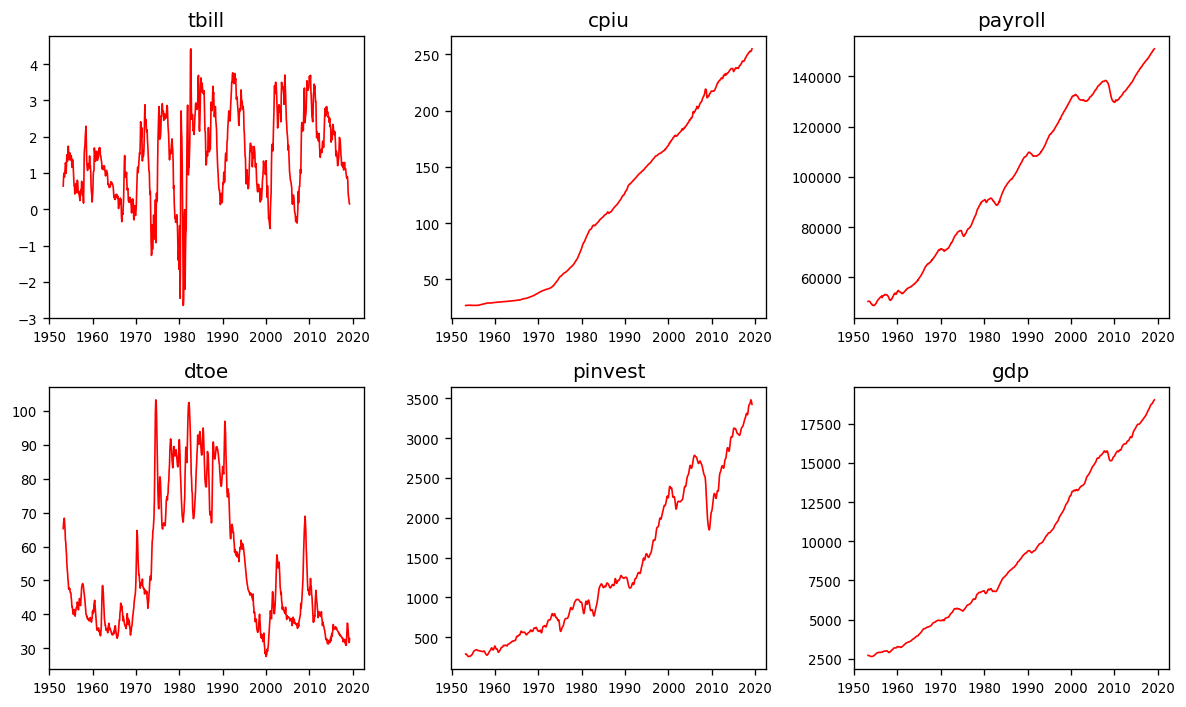

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=120, figsize=(10,6))
for col, ax in enumerate(axes.flatten()):
    ax.plot(data[data.columns[col]], color='red', linewidth=1)
    ax.set_title(data.columns[col])
    ax.tick_params(labelsize=8)
    
plt.tight_layout()

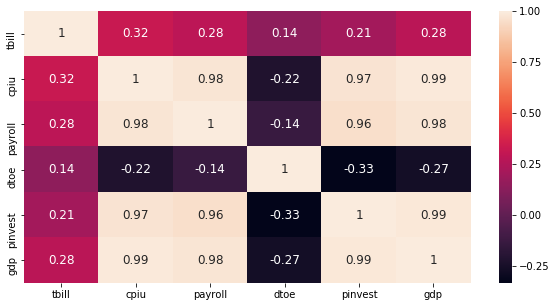

In [18]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(data.corr(), xticklabels=data.columns.values, yticklabels=data.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

CPIU, PAYROLL, PINVEST, and GDP are highly correlated. This could create problems of multicollinearity. Multicollinearity reduces the statistical significance of the variables, making it difficult to pinpoint which variable is responsible for changes in GDP.

Going back to the criteria set at the beginning, CPIU and PAYROLL will be removed as PINVEST has the earliest inflection point.

In [19]:
data = data.drop(['cpiu', 'payroll'], axis=1)

#### Model Selection

For dealing with multiple variables, a vector autoregression (VAR) model is right for the job.

VAR assumes Granger causality relationship between all of the variables, in other words, all variables are dependent variables on each other. We can verify if we should reject this hypothesis.

#### Test for Autocorrelation

GDP is highly autocorrelated. While this feature can allow a strong generalization of GDP trend (2% year-over-year growth), we are interested in the short term fluctuations.

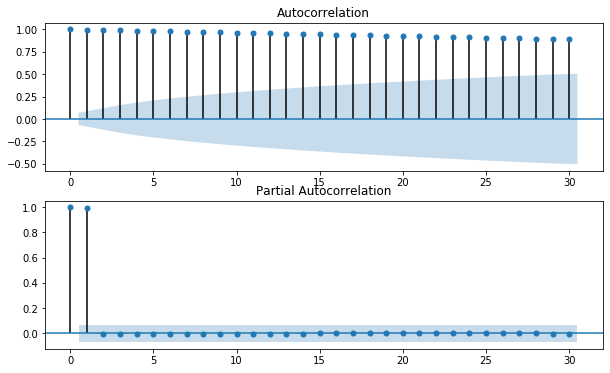

In [20]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(gdp.gdp, ax=ax[0])
ax[1] = plot_pacf(gdp.gdp, ax=ax[1])

#### Test for Stationarity

It is also important for all data to be stationary, meaning the mean and variance do not 

In [21]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

    def ADF_Stationarity_Test(self, timeseries, printResults = True):

        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value

            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [22]:
StationarityTests()

for var in data:
    StationarityTests().ADF_Stationarity_Test(data[var], printResults = True)
    print("Is the time series stationary? {0}".format(StationarityTests().isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -5.092447
P-Value                   0.000015
# Lags Used              16.000000
# Observations Used     776.000000
Critical Value (1%)      -3.438805
Critical Value (5%)      -2.865272
Critical Value (10%)     -2.568757
dtype: float64
Is the time series stationary? None
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.121154
P-Value                   0.706563
# Lags Used              21.000000
# Observations Used     771.000000
Critical Value (1%)      -3.438860
Critical Value (5%)      -2.865296
Critical Value (10%)     -2.568770
dtype: float64
Is the time series stationary? None
Augmented Dickey-Fuller Test Results:
ADF Test Statistic        0.350306
P-Value                   0.979538
# Lags Used              17.000000
# Observations Used     775.000000
Critical Value (1%)      -3.438816
Critical Value (5%)      -2.865277
Critical Value (10%)     -2.568760
dtype: float64
Is the time series stationary? Non

#### Data Transformation

To make our data stationary, we will take the first difference of the month(t) and its lag value:
(y_t) - (y_(t-1))

If first difference is not enough, second difference is applied.

But due to the fact that logarithmic functions cannot deal with 0, we must find an alternative.

In [23]:
data_diff = data.diff(1).dropna()
# data_diff = data_diff.diff(1).dropna()

In [24]:
data_diff.head(10)

,tbill,dtoe,pinvest,gdp
date,,,,
1953-05-01,0.25,1.742716,1.613425,1.621420
1953-06-01,0.11,0.606322,-2.577208,-6.062339
1953-07-01,-0.11,0.705886,-5.070217,-10.857081
1953-08-01,0.02,-1.808981,-7.085456,-14.215786
1953-09-01,0.17,-1.437653,-6.992561,-14.412164
1953-10-01,0.20,-3.142394,-6.327984,-12.301050
1953-11-01,-0.04,-0.702914,-2.565372,-7.680203
1953-12-01,-0.25,-2.110366,-1.320379,-4.360833
1954-01-01,0.31,-1.427668,2.007750,-0.685964


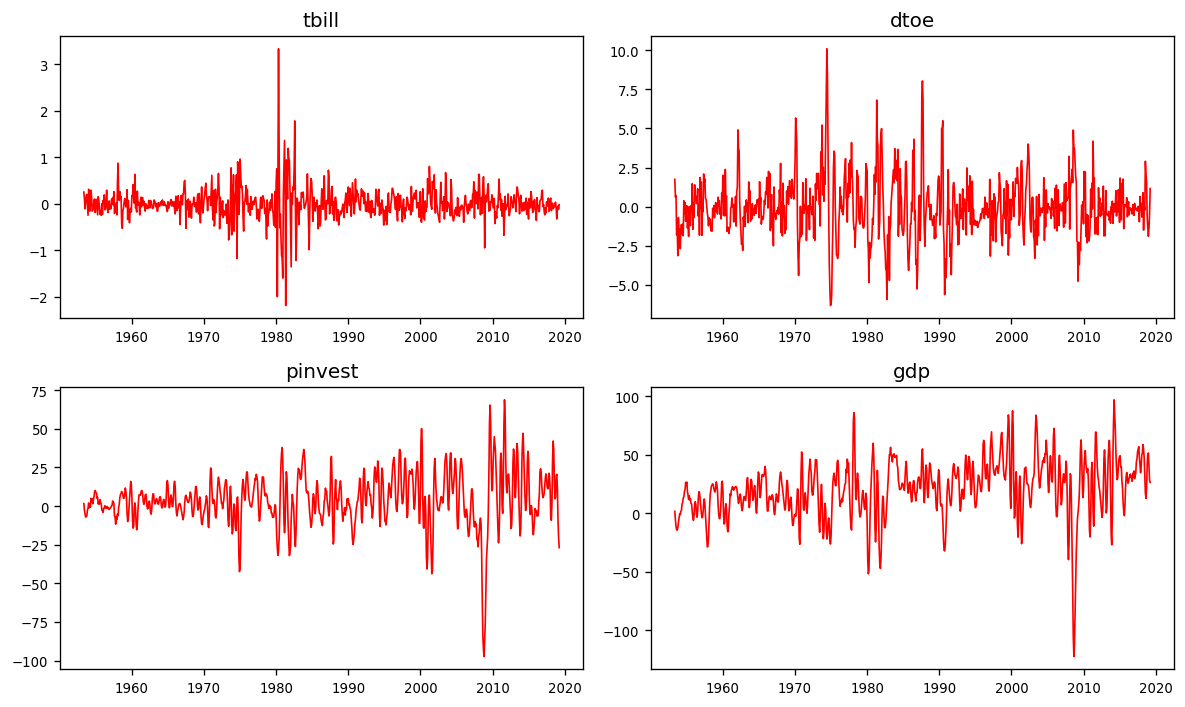

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for col, ax in enumerate(axes.flatten()):
    ax.plot(data_diff[data_diff.columns[col]], color='red', linewidth=1)
    ax.set_title(data_diff.columns[col])
    ax.tick_params(labelsize=8)
    
plt.tight_layout()

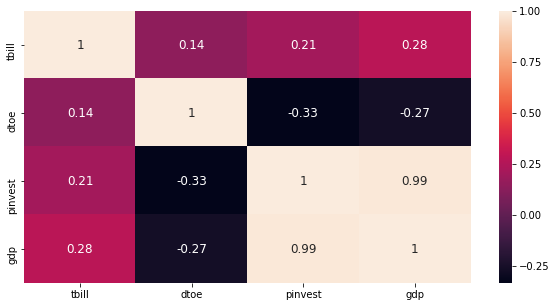

In [26]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(data.corr(), xticklabels=data_diff.columns.values, yticklabels=data.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

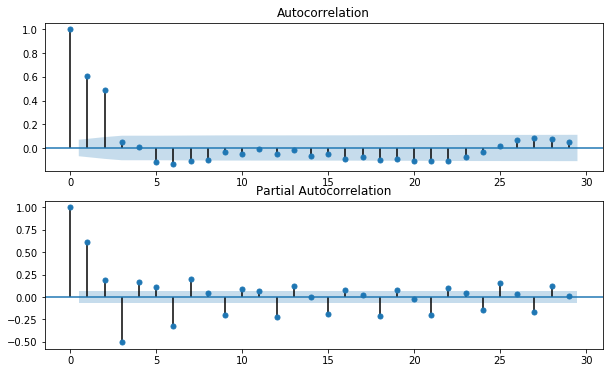

In [32]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(data_diff.dtoe, ax=ax[0])
ax[1] = plot_pacf(data_diff.dtoe, ax=ax[1])

In [30]:
for var in data_diff:
    StationarityTests().ADF_Stationarity_Test(data_diff[var], printResults = True)
    print("Is the time series stationary? {0}".format(StationarityTests().isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -7.538231e+00
P-Value                 3.432770e-11
# Lags Used             1.900000e+01
# Observations Used     7.720000e+02
Critical Value (1%)    -3.438849e+00
Critical Value (5%)    -2.865291e+00
Critical Value (10%)   -2.568767e+00
dtype: float64
Is the time series stationary? None
Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -7.822534e+00
P-Value                 6.611441e-12
# Lags Used             2.100000e+01
# Observations Used     7.700000e+02
Critical Value (1%)    -3.438871e+00
Critical Value (5%)    -2.865301e+00
Critical Value (10%)   -2.568773e+00
dtype: float64
Is the time series stationary? None
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -5.417441
P-Value                   0.000003
# Lags Used              16.000000
# Observations Used     775.000000
Critical Value (1%)      -3.438816
Critical Value (5%)      -2.865277
Critical Value (10%)     -2.568760
dtype: float64
Is the

## Data Analysis

## Findings

## Limitations

This predictor does not pinpoint the cause of a recession, but makes a general comment about the state of the economy. The underlying assumption is that these inputs are efficient enough to reflect long term market conditions, but inefficient enough to price in the short term fluctuations in GDP.

When trying to quantify debt as percentage of equity, it turned out that noncoporate entities 

## Closing Thoughts

Special thanks to Mortada Mehyar for creating fredapi. This saves some time from having to deal with JSON format.

## Part 2

#### Data Preparation

Let's set up recession decision variable. Difficulty joining series, so had to convert to list, append, then reconvert to series.

In [29]:
# Create a DataFrame for recession
start_date = pd.to_datetime('1951, 10, 1')
end_date = pd.to_datetime('today')
recessions = pd.date_range(start_date, end_date, freq='MS')
recessions = recessions.to_frame().reset_index()

# Mark recession months as 1, non-recession months as 0
recessions.iloc[:,1] = 0
recessions.loc[recessions.iloc[:,0].isin(recession_months), 0] = 1
recessions.rename(columns={'index':'date', 0:'recession'}, inplace=True)

# possible to create lambda variables?

r_1953 = pd.Series(pd.date_range(pd.to_datetime('1953, 3, 1'), pd.to_datetime('1954, 5, 1'))).tolist()
r_1957 = pd.Series(pd.date_range(pd.to_datetime('1957, 8, 1'), pd.to_datetime('1958, 4, 1'))).tolist()
r_1960 = pd.Series(pd.date_range(pd.to_datetime('1960, 4, 1'), pd.to_datetime('1961, 2, 1'))).tolist()
r_1962 = pd.Series(pd.date_range(pd.to_datetime('1969, 12, 1'), pd.to_datetime('1970, 11, 1'))).tolist()
r_1973 = pd.Series(pd.date_range(pd.to_datetime('1973, 11, 1'), pd.to_datetime('1975, 3, 1'))).tolist()
r_1980 = pd.Series(pd.date_range(pd.to_datetime('1980, 1, 1'), pd.to_datetime('1980, 7, 1'))).tolist()
r_1981 = pd.Series(pd.date_range(pd.to_datetime('1981, 7, 1'), pd.to_datetime('1982, 11, 1'))).tolist()
r_1990 = pd.Series(pd.date_range(pd.to_datetime('1990, 7, 1'), pd.to_datetime('1991, 3, 1'))).tolist()
r_2001 = pd.Series(pd.date_range(pd.to_datetime('2001, 3, 1'), pd.to_datetime('2001, 11, 1'))).tolist()
r_2007 = pd.Series(pd.date_range(pd.to_datetime('2007, 12, 1'), pd.to_datetime('2009, 6, 1'))).tolist()

print('Original series length:', len(r_1953))

recession_months = pd.Series(r_1953 + r_1957 + r_1960 + r_1962 + r_1973 + r_1980 + r_1981 + r_1990 + r_2001 + r_2007)

print('Verify series was appended:', len(recession_months))

recessions.iloc[15:20]

NameError: name 'recession_months' is not defined